In [16]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
import pandas as pd

In [17]:
df=pd.read_csv('../3k.dat',sep=' ')
df

,x1,y1,x2,y2,x3,y3,t,E
0,-0.500000,2.00000,0.700000,0.700000,0.800000,-0.800000,0.00,1.25872
1,-0.499979,1.99997,0.699992,0.709968,0.779996,-0.799962,0.01,1.25872
2,-0.499917,1.99989,0.699967,0.719871,0.759983,-0.799849,0.02,1.25872
3,-0.499813,1.99975,0.699923,0.729713,0.739964,-0.799662,0.03,1.25872
4,-0.499666,1.99956,0.699859,0.739492,0.719939,-0.799400,0.04,1.25872
...,...,...,...,...,...,...,...,...
1995,-12.509600,3.49009,-11.539000,1.698180,-23.916000,12.668800,19.95,1.25873
1996,-12.518900,3.48775,-11.546100,1.701380,-23.926000,12.675100,19.96,1.25873
1997,-12.528200,3.48537,-11.553200,1.704600,-23.936000,12.681400,19.97,1.25873
1998,-12.537400,3.48295,-11.560300,1.707850,-23.946100,12.687600,19.98,1.25873


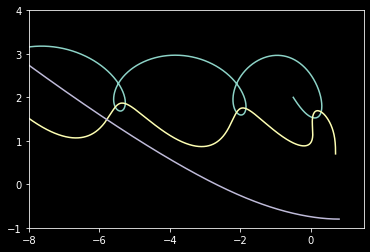

In [24]:
plt.style.use('dark_background')
plt.plot(df['x1'],df['y1'])
plt.plot(df['x2'],df['y2'])
plt.plot(df['x3'],df['y3'])

axes = plt.gca()
axes.set_xlim(-8,1.5)
axes.set_ylim(-1,4)

plt.savefig('3k.svg')

In [19]:
# initialization function 
def init(): 
	# creating an empty plot/frame 
	line1.set_data([], []) 
	line2.set_data([], []) 
	line3.set_data([], []) 

	points.set_data([], [])
	return line1, line2, line3, points

# animation function 
def animate(i): 
	k = i
	# x, y values to be plotted 
	x1 = df['x1'][k]
	y1 = df['y1'][k]
	x2 = df['x2'][k]
	y2 = df['y2'][k]
	x3 = df['x3'][k]
	y3 = df['y3'][k]
	
	# appending new points to x, y axes points list 
	x1data.append(x1) 
	y1data.append(y1)
	x2data.append(x2)
	y2data.append(y2)
	x3data.append(x3)
	y3data.append(y3)

	line1.set_data(x1data, y1data) 
	line2.set_data(x2data, y2data)
	line3.set_data(x3data, y3data)
	points.set_data([x1,x2,x3], [y1,y2,y3])
	return line1, line2, line3 , points

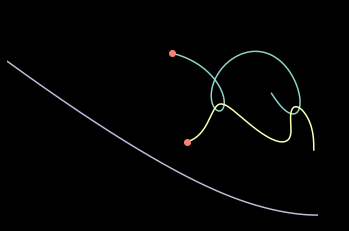

In [22]:
plt.style.use('dark_background')

# lists to store x and y axis points 
x1data, y1data, x2data, y2data, x3data, y3data = [], [], [], [],[], []

fig = plt.figure() 
ax = plt.axes(xlim=(-8,1.5), ylim=(-1,4)) 
line1, = ax.plot([], []) 
line2, = ax.plot([], []) 
line3, = ax.plot([], [])
points, = ax.plot([], [], 'o')


# setting a title for the plot 
# plt.title('Creating a growing coil with matplotlib!') 
# hiding the axis details 
plt.axis('off') 

# call the animator	 
anim = animation.FuncAnimation(fig, animate,  init_func=init,
							frames=800, interval=20, blit=True) 

# save the animation as mp4 video file 
anim.save('3k.gif',writer='imagemagick') 